# Demonstration of using various functions for visualizing basic YOLOv8/v9 inference results and handling overlapping crops:

```bash
pip install patched_yolo_infer
```

In [3]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

from patched_yolo_infer import (
    visualize_results_usual_yolo_inference,
    get_crops,
)

#### 1. function __visualize_results_usual_yolo_inference__:

    Visualizes the results of usual YOLOv8 or YOLOv8-seg inference on an image

    Args:
        img (numpy.ndarray): The input image in BGR format.
        model: The object detection or segmentation model (yolov8).
        imgsz (int): The input image size for the model. Default is 640.
        conf (float): The confidence threshold for detection. Default is 0.5.
        iou (float): The intersection over union threshold for detection. Default is 0.7.
        segment (bool): Whether to perform instance segmentation. Default is False.
        show_boxes (bool): Whether to show bounding boxes. Default is True.
        show_class (bool): Whether to show class labels. Default is True.
        fill_mask (bool): Whether to fill the segmented regions with color. Default is False.
        alpha (float): The transparency of filled masks. Default is 0.3.
        color_class_background (tuple): The background bgr color for class labels. Default is (0, 0, 255) (red).
        color_class_text (tuple): The text color for class labels. Default is (255, 255, 255) (white).
        thickness (int): The thickness of bounding box and text. Default is 4.
        font: The font type for class labels. Default is cv2.FONT_HERSHEY_SIMPLEX.
        font_scale (float): The scale factor for font size. Default is 1.5.
        delta_colors (int): The random seed offset for color variation. Default is 0.
        dpi (int): Final visualization size (plot is bigger when dpi is higher).
        random_object_colors (bool): If True, colors for each object are selected randomly.
        show_confidences (bool): If True and show_class=True, confidences near class are visualized.
        axis_off (bool): If True, axis is turned off in the final visualization.
        show_classes_list (list): If empty, visualize all classes. Otherwise, visualize only classes in the list.

    Returns:
        None

## YOLOv8-seg - instance segmentation vizualization example:

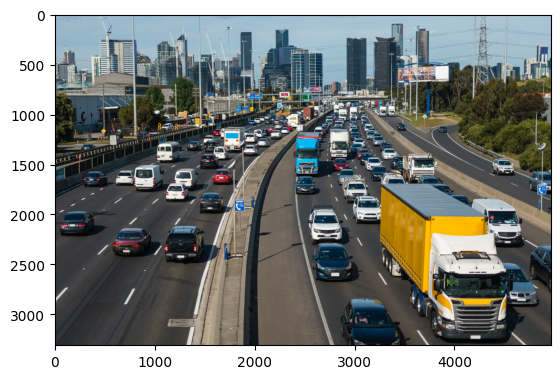

In [4]:
# Load the image 
img_path = 'test_images/image-test.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB));

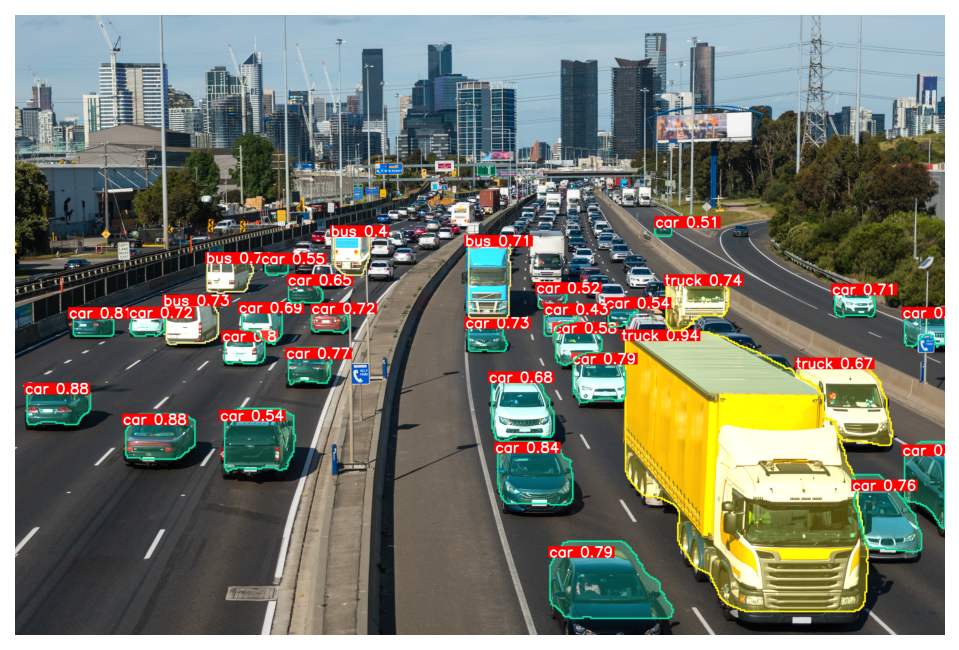

In [5]:
# Define the parameters
imgsz = 640
conf = 0.4
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt")  # Make sure the model file is in the correct path

visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    delta_colors=3,
    thickness=8,
    font_scale=2.5,
    show_boxes=False,
    fill_mask=True,
    alpha=0.3,
    random_object_colors=False,
    show_confidences=True,
)

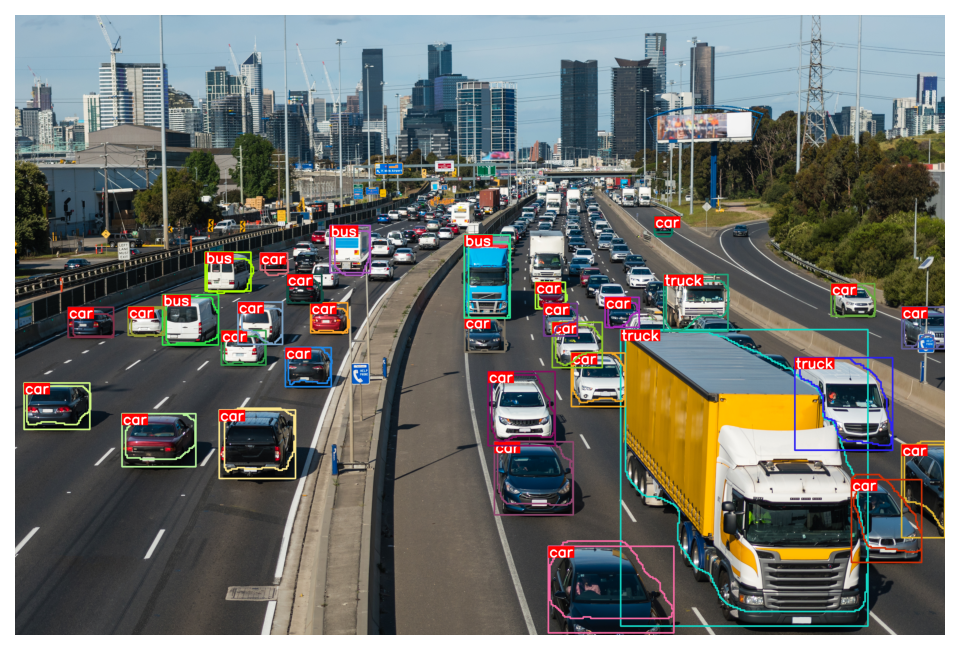

In [6]:
visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    thickness=8,
    font_scale=2.5,
    show_boxes=True,
    fill_mask=False,
    alpha=0.4,
    random_object_colors=True,
    show_confidences=False,
)

## YOLOv8 - detection vizualization example:

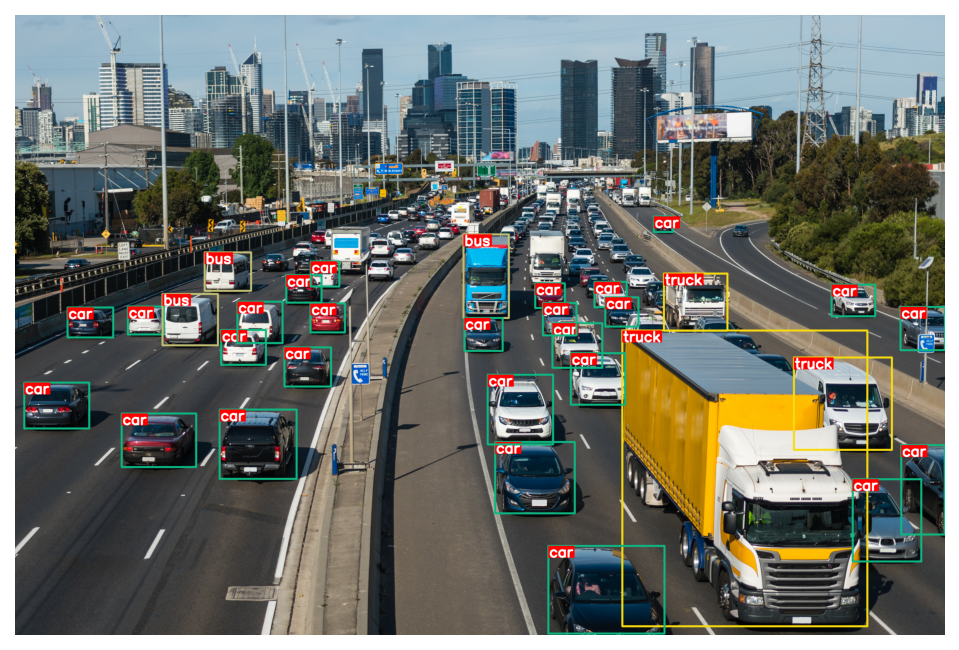

In [7]:
# Load the YOLOv8 model
model = YOLO("yolov8m.pt")  # Make sure the model file is in the correct path

# Load the image 
img_path = "test_images/image-test.jpg"
img = cv2.imread(img_path)

visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=False,
    delta_colors=3,
    thickness=9,
    font_scale=2.5,
    show_boxes=True,
    random_object_colors=False,
    show_confidences=False,
)

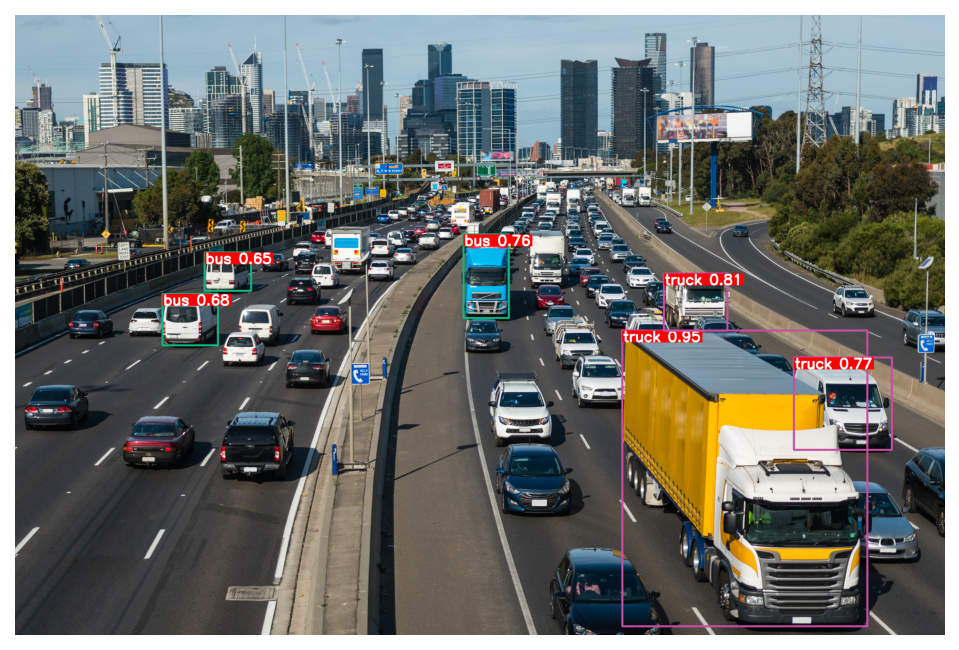

In [8]:
visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=False,
    delta_colors=0,
    thickness=9,
    font_scale=2.5,
    show_boxes=True,
    random_object_colors=False,
    show_confidences=True,
    show_classes_list=[3,4,5,6,7]
)

---

## Cropping with Overlapping:

#### 2. function __get_crops__:


    Preprocessing of the image. Generating crops with overlapping.

    Args:
        image_full (array): numpy array of a BGR image.
        shape_x (int): size of the crop in the x-coordinate.
        shape_y (int): size of the crop in the y-coordinate.
        overlap_x (float, optional): Percentage of overlap along the x-axis
            (how much subsequent crops borrow information from previous ones). Default is 15.
        overlap_y (float, optional): Percentage of overlap along the y-axis
            (how much subsequent crops borrow information from previous ones). Default is 15.
        show (bool): enables the mode to display images using plt.imshow. Default is False.
        save_crops (bool): enables saving generated images. Default is False.
        save_folder (str): folder path to save the images. Default is "crops_folder".
        start_name (str): starting name for saved images. Default is "image".
        resize (bool): If True, the image is resized to fit the last crop exactly. 
                       If False, the image is not resized. Default is False.

    Returns:
        data_all_crops (list): List containing cropped images.


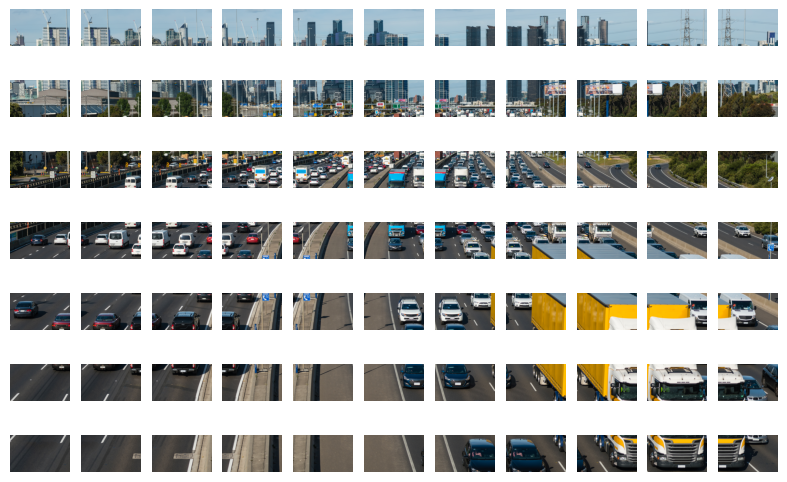

Number of generated images: 77


In [9]:
img_path = 'test_images/image-test.jpg'
image = cv2.imread(img_path)

data_all_crops = get_crops(
    image,
    shape_x=800,
    shape_y=500,
    overlap_x=50,
    overlap_y=10,
    show=True,
    save_crops=True,
    start_name="img",
    resize=True,
)

In [10]:
np.array(data_all_crops).shape

(77, 500, 800, 3)

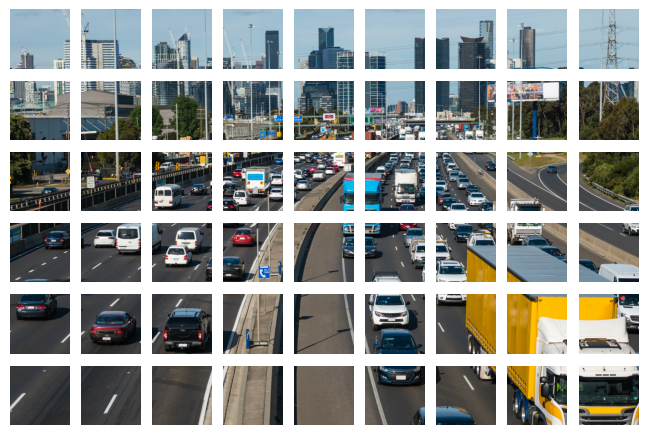

Number of generated images: 54


In [11]:
data_all_crops = get_crops(image, shape_x=500, shape_y=500, overlap_x=0, overlap_y=0, show=True)

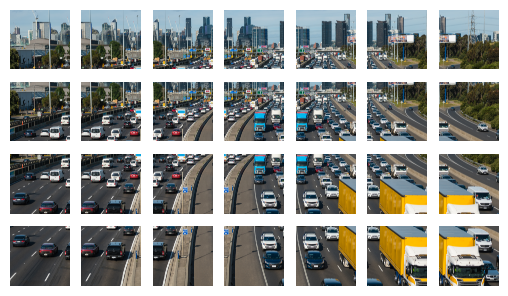

Number of generated images: 28


In [12]:
data_all_crops = get_crops(image, shape_x=1200, shape_y=1200, overlap_x=50, overlap_y=50, show=True)

Exemple of one outut crop from the list:

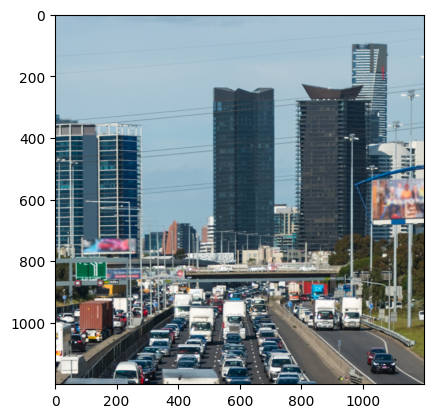

In [13]:
plt.imshow(cv2.cvtColor(data_all_crops[4].copy(), cv2.COLOR_BGR2RGB));

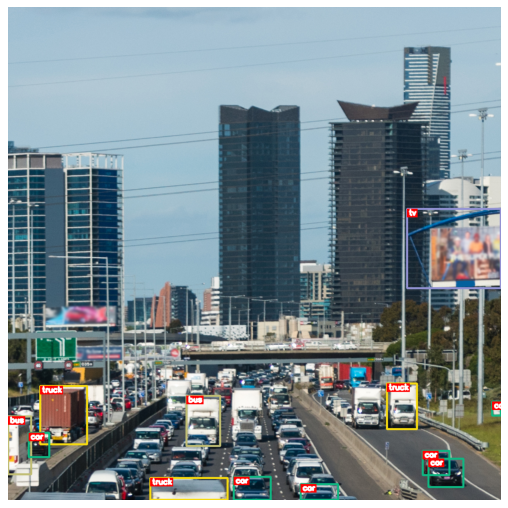

In [14]:
visualize_results_usual_yolo_inference(
    data_all_crops[4].copy(),
    model,
    imgsz,
    conf,
    iou,
    delta_colors=3,
    thickness=3,
    font_scale=0.6,
    dpi=80,
)